# Projeto Integrador: Matemática Computacional (Group 34)
## Introduction (Sprint 3)

During sprint 3 we were tasked to find solutions for the MATCP user stories (US15 and US16), wich were mainly focused on linear regression and polynomial regression.

The work presented in this file is a collaborative solution by our team, wich was developed in Python along with the explanation of the results following the aceptance criteria of the client.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp  

---
# USER STORY 15 - Introduction

US15 - <u>The monthly cost associated with water consumption in each park is related to its size.</u> Consider the file ”water consumption updated.csv”
adapted from the file used in US09, in which the daily water consumption of more parks were inserted. The file ”Area.csv” has the area (in hectares) of each park. Consider that the cost of water consumed follows the rules defined in US09. <u>The park management company is considering starting to manage a new 55-hectare park. Predict the average monthly cost that will be paid for water consumption in this new park. Apply the linear regression model, considering the park area as the independent variable and the average monthly cost spent on water consumption as the response variable.</u> Start by studying the feasibility of linear adjustment.

In this US we used the following formulas:

$$
y = \beta_0 + \beta_1 x
$$.



Sxx = 7875.880; Syy = 280838762.028; Sxy = 1077923.778
beta0 = 379.343; beta1 = 136.864
A reta de regressão é y = 379.343 + 136.864x
A reta de regressão é y = 379.343 + 136.864x
Custo esperado mensal para um parque de 55ha:  7906.858287649215


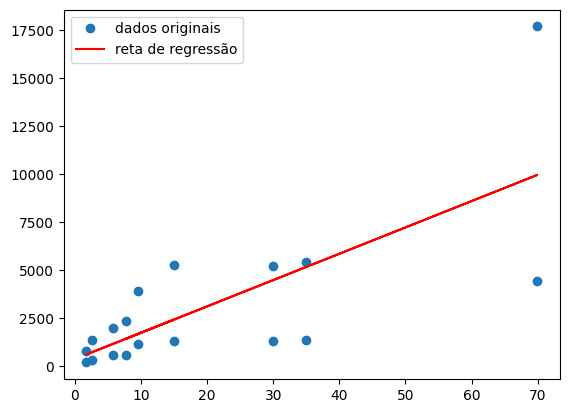

In [30]:

dataHeaders = ['Park','Year', 'Month', 'Day', 'Consumption']
allData = pd.read_csv('water_consumption_updated.csv', sep=';', names=dataHeaders, skiprows=1);

costUntil1000 = 0.7;
extraAfter1000Percent = 0.15;

allData['Consumption'] = allData['Consumption'].str.replace(',', '.')
allData['Consumption'] = pd.to_numeric(allData['Consumption'])
allData['Month'] = pd.to_numeric(allData['Month'])
parkWaterConsumptionMonthly = allData.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()

parkMonthsCounted = parkWaterConsumptionMonthly.groupby(['Park', 'Year'])['Month'].count().reset_index()

parkWaterCostMonthly = parkWaterConsumptionMonthly['Consumption'].apply(lambda x: x*costUntil1000 if x <= 1000 else 1000*costUntil1000 + (x-1000)*costUntil1000*extraAfter1000Percent)                                

parkWaterConsumptionMonthly = parkWaterConsumptionMonthly.groupby(['Park'])['Consumption'].sum().reset_index()

# Merge the two dataframes on 'Park'
merged_df = pd.merge(parkWaterConsumptionMonthly, parkMonthsCounted, on='Park')

# Perform the division operation
merged_df['AverageMonthlyCosts'] = merged_df['Consumption'].div(merged_df['Month'])

merged_df.to_csv('parkAverageMonthlyCosts.csv', sep=';')

areaHeaders = ['Park', 'Area']
areaData = pd.read_csv('area.csv', sep=';', names=areaHeaders, skiprows=1);

areaData['Area'] = areaData['Area'].str.replace(',', '.')
areaData['Area'] = pd.to_numeric(areaData['Area'])

parkWaterConsumptionMonthly = pd.merge(merged_df, areaData, on='Park')

x = parkWaterConsumptionMonthly['Area'].values
y = parkWaterConsumptionMonthly['AverageMonthlyCosts'].values

Sxx = 0; Syy = 0; Sxy = 0
media_x = np.mean(x); media_y = np.mean(y)

for value_x in x:
    Sxx += (value_x - media_x)**2
for value_y in y:
    Syy += (value_y - media_y)**2
for index in range(len(x)):
    Sxy += (x[index] - media_x) * (y[index] - media_y)

print(f'Sxx = {Sxx:.3f}; Syy = {Syy:.3f}; Sxy = {Sxy:.3f}')

beta1 = Sxy / Sxx
beta0 = media_y - beta1 * media_x
print(f'beta0 = {beta0:.3f}; beta1 = {beta1:.3f}')
print(f'A reta de regressão é y = {beta0:.3f} + {beta1:.3f}x')

modelo = sp.stats.linregress(x, y)
print(f'A reta de regressão é y = {modelo.intercept:.3f} + {modelo.slope:.3f}x')
df = pd.DataFrame({'x':x, 'y':y})  # Corrected this line
plt.plot(df.x, df.y, 'o', label='dados originais')
plt.plot(df.x, modelo.intercept + modelo.slope*df.x, 'r', label='reta de regressão')
plt.legend() # A reta de regressao˜ e igual ´ a anteriormente obtida. 

print("Custo esperado mensal para um parque de 55ha: ", modelo.intercept + modelo.slope*55);

---
# USER STORY 16

US16 -

#### Solution in Python:

Coefficients:  [ 7.60279067e-08 -8.70860532e-05  1.21438149e-01]
Intercept:  0.12143814943221576
The polynomial equation is: 0.12143814943221576 + -8.708605324790625e-05*x^1 + 0.12143814943221576*x^2


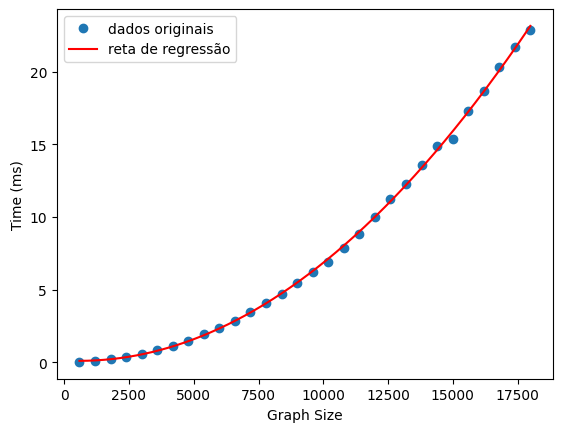

In [31]:
#set the file headers and read the data from the csv file
us14_headers = ['size','time']
us14_data = pd.read_csv('solution_us14.csv', sep=';', names=us14_headers, skiprows=1);

#fix the data to ensure numbers with comas to be float with dots
us14_data['size'] = pd.to_numeric(us14_data['size'], errors='coerce')
us14_data['time'] = us14_data['time'].str.replace(',', '.')
us14_data['time'] = pd.to_numeric(us14_data['time'], errors='coerce')

#use polynominal regression to generate the model
poly_model = np.polyfit(us14_data['size'], us14_data['time'], 2)
poly_function = np.poly1d(poly_model)

# Coefficients of the polynomial are in the poly_model array
print("Coefficients: ", poly_model)

# For a polynomial, the intercept is just the last coefficient
print("Intercept: ", poly_model[-1])

equation = f"{poly_model[-1]}"
for i in range(1, len(poly_model)):
    equation += f" + {poly_model[i]}*x^{i}"

print(f"The polynomial equation is: {equation}")

x_range = np.linspace(us14_data['size'].min(), us14_data['size'].max(), 500)

plt.plot(us14_data['size'], us14_data['time'], 'o', label='dados originais')
plt.plot(x_range, poly_function(x_range), 'r', label='reta de regressão')
plt.xlabel('Graph Size'); plt.ylabel('Time (ms)')
plt.legend()


----
## Contribution of each member of the group to the development of the work

#### `100%` - Rui Santiago(1221402)
#### `0%` - Francisco Trocado(1230608)
#### `0%` - Diógenes Jesus(1210879)
#### `0%` - Alexandre Moura(1231193)
#### `100%` 